In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date = session.query(measurement.date).order_by(measurement.date.desc()).first()
date

('2017-08-23',)

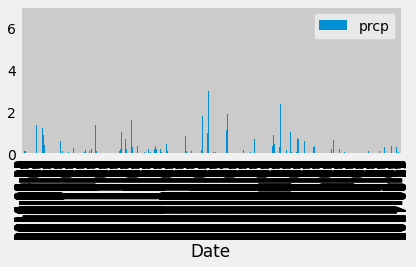

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date >= year).all()
precip_rows = [{'Date': result[1], 'prcp': result[0]} for result in precip]
precip_rows

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_rows).set_index('Date')

# Sort the dataframe by date
precip_df.sort_values('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot.bar()
plt.tight_layout()
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_df.describe()
            


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity = [measurement.station,
    func.count(measurement.station)]
station_activity = session.query(*activity).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

for x in station_activity:
    print(x)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_activity = session.query(func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)).\
    filter(measurement.station=='USC00519281').all()
most_activity


[(54.0, 85.0, 71.66378066378067)]

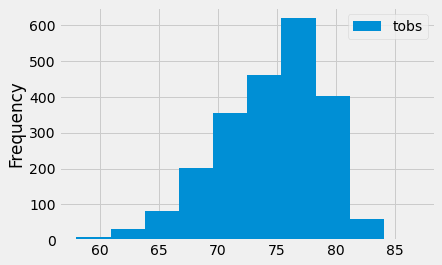

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and  temperatures
temp = session.query(measurement.tobs, measurement.date).\
    filter(measurement.date >= year).all()
temp_rows = [{'Date': result[1], 'tobs': result[0]} for result in temp]
temp_rows

# Save the query results as a Pandas DataFrame and set the index to the date column
temp_df = pd.DataFrame(temp_rows).set_index('Date')

# Sort the dataframe by date
temp_df.sort_values('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
temp_df.plot.hist()
plt.show()

# Close session

In [16]:
# Close Session
session.close()